In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [72]:

class FeatureExtract:
    def __init__(self,kernel = np.ones((2,2),dtype=np.int8), thresh = 100):
        self.kernel = kernel
        self.thresh = thresh
        print('init FeatureExtract')

    def get_feature(self, img):
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #开运算
        opening1 = cv2.morphologyEx(gray.copy(),cv2.MORPH_OPEN,self.kernel, iterations=1)
        # 闭运算
        closing1 = cv2.morphologyEx(opening1.copy(), cv2.MORPH_CLOSE, self.kernel,iterations=1)

        #膨胀
        dilation = cv2.dilate(closing1,self.kernel,iterations = 1)
        #高斯滤波
        gaussian = cv2.GaussianBlur(dilation,(3,3),0)#高斯滤波，参数：1.原图像，2.卷积核大小，3.x方向标准差
        

        #腐蚀
        erosion = cv2.erode(gaussian,self.kernel,iterations = 1)
        #开运算
        opening = cv2.morphologyEx(erosion,cv2.MORPH_OPEN,self.kernel, iterations=1)
        # ret是阈值，thresh1是二值化后的图像
        _,thresh1 = cv2.threshold(opening,self.thresh,255,cv2.THRESH_BINARY)  
        #转换为三通道
        thresh1 = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2BGR)

        return thresh1

In [73]:
img1 = cv2.imread('./img/w01870.jpg')
img2 = cv2.imread('./img/w01637.jpg')
img3 = cv2.imread('./img/h02060.jpg')

init FeatureExtract


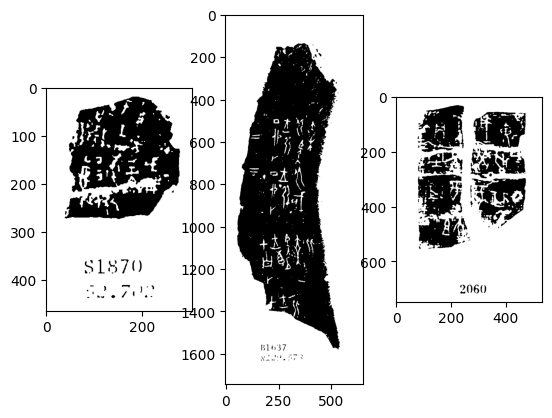

True

In [74]:
feature_extract = FeatureExtract()
feature1 = feature_extract.get_feature(img1)
feature2 = feature_extract.get_feature(img2)
feature3 = feature_extract.get_feature(img3)
plt.subplot(131)
plt.imshow(feature1,cmap='gray')
plt.subplot(132)
plt.imshow(feature2,cmap='gray')
plt.subplot(133)
plt.imshow(feature3,cmap='gray')
plt.show()
cv2.imwrite('./result/feature1.jpg',feature1)
cv2.imwrite('./result/feature2.jpg',feature2)
cv2.imwrite('./result/feature3.jpg',feature3)



In [77]:
#查看图片的像素值
fea =cv2.imread('./result/feature1.jpg')
fea.shape


(465, 304, 3)